# Ses İşleme

Bu canlı kodda hem ses dalgaları üretecek hem de diskteki `.wav` dosyalarını analiz edeceğiz.

Amacımız, tıpkı görsellerin veya videoların (ve genel olarak bir bilgisayarın işlediği hemen her şeyin) olduğu gibi, bir sesin sayılarla nasıl kodlandığını anlamak.

In [1]:
!pip install scipy --quiet


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio

## Ses Sentezi

Bir sesi sıfırdan üretmeden önce, bilgisayarın mikrofondan gelen sesi nasıl kaydettiğine bakalım:

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/mic_recording_original.png" width=1000>

In [3]:
R = 44100 # Sampling rate
D = 3     # Duration of the sound

❓ Frekans $f$ (Hz cinsinden) alan ve örnekleme oranı `R`, süre `D` (sabitler) olacak şekilde sinüzoidal bir sinyal üreten `note(f)` fonksiyonunu yazın.

<details>
    <summary>💡 <strong>İpucu</strong> </summary>
    
Frekansı $f$ ve maksimum genliği $A$ olan tek frekanslı bir ses dalgası şu sinüs fonksiyonuyla temsil edilir:

$$y(t)=A \times sin(2 \pi f t)$$

Burada $t$ zaman, $y(t)$ ise $t$ anındaki ses dalgasının genliğidir.

Şimdilik maksimum genlik $A$ değerini `1` kabul edebilirsiniz.

Unutmayın: [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) ile büyük bir sayı listesi üretebilirsiniz.
</details>

In [4]:
def note(f):
    
    t = np.linspace(0, D, R * D, endpoint=False)
    
    
    y = np.sin(2 * np.pi * f * t)
    
    return y

❓ `note(f)` çıktısını `440 Hz` için çizin. `1 Hz` için de çizin. Ne görüyorsunuz?

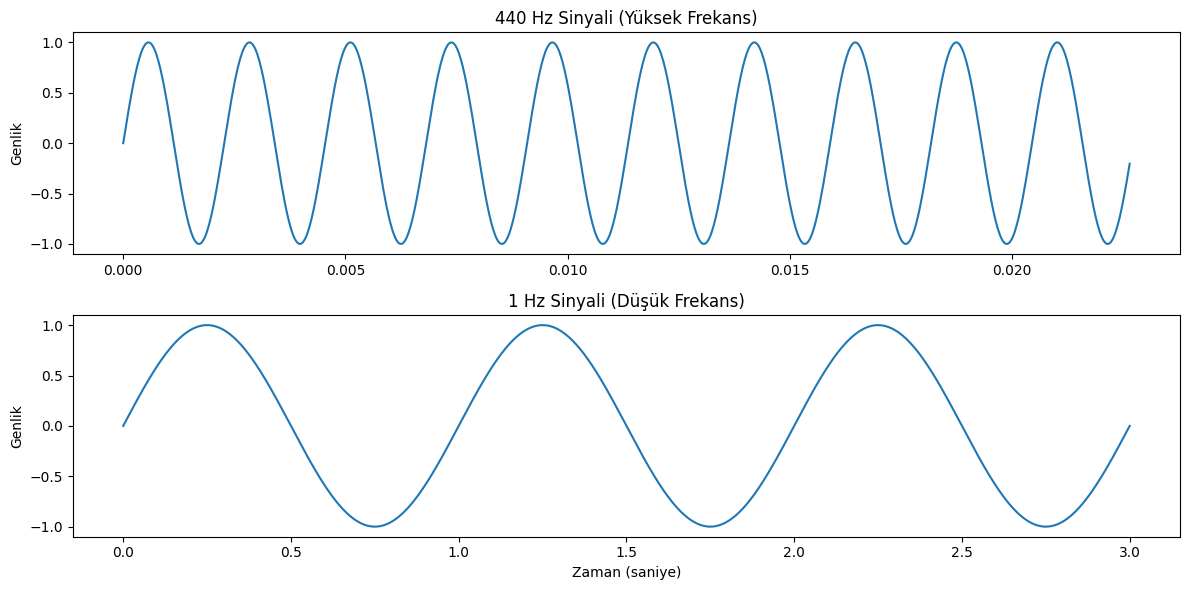

In [6]:

signal_440 = note(440)
signal_1 = note(1)


t = np.linspace(0, D, R * D, endpoint=False)

plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(t[:1000], signal_440[:1000]) # İlk 1000 örnek yaklaşık 0.02s yapar
plt.title("440 Hz Sinyali (Yüksek Frekans)")
plt.ylabel("Genlik")


plt.subplot(2, 1, 2)
plt.plot(t, signal_1)
plt.title("1 Hz Sinyali (Düşük Frekans)")
plt.xlabel("Zaman (saniye)")
plt.ylabel("Genlik")

plt.tight_layout()
plt.show()

❓ `note` fonksiyonunu çağırarak akorttaki `A` notasını (440 Hz) üretin. Çalın.

<details>
    <summary>💡 <strong>İpucu</strong></summary>

Notebook’un ilk hücresinde içe aktarılmış `IPython.display` içindeki [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) nesnesini kullanın.
</details>

In [7]:
a_note = note(440)

Audio(a_note, rate=R)

❓ Birden fazla notayı üst üste bindirmeyi deneyin; örneğin `A` + tam beşli, majör (veya minör) üçlü vb. Bunları `chord` değişkeninde toplayın. Çalın!

<details>
    <summary>💡 <strong>İpucu</strong></summary>
    
Wikipedia’daki [Frekans Oranı](https://en.wikipedia.org/wiki/Interval_(music)#Frequency_ratios) tablosuna bakın. Örneğin tam beşlinin oranı $\frac{3}{2}$’dir.
</details>

In [8]:

f_A = 440
f_C_sharp = f_A * (5/4) 
f_E = f_A * (3/2)        


chord = note(f_A) + note(f_C_sharp) + note(f_E)

Audio(chord, rate=R)

❓ Akorun ilk `1000` örneğini çizin

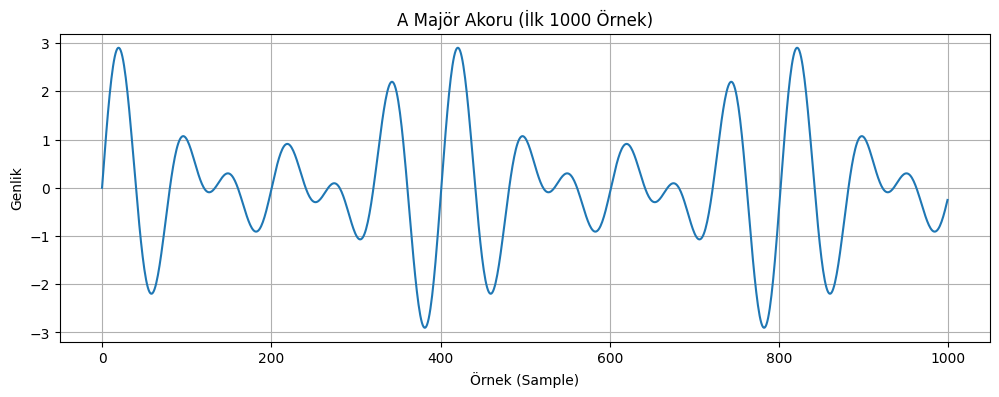

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(chord[:1000])
plt.title("A Majör Akoru (İlk 1000 Örnek)")
plt.xlabel("Örnek (Sample)")
plt.ylabel("Genlik")
plt.grid(True)
plt.show()

## [Hızlı Fourier dönüşümü](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analizi, bir sinyali özgün alanından (çoğunlukla zaman veya uzay) frekans alanındaki bir gösterime dönüştürür ve tersini de yapar.
> **Wikipedia**

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/fourier_transformation.png" width=550>

Yukarıda oluşturduğumuz sinyalleri analiz etmek için [`scipy.fft`](https://docs.scipy.org/doc/scipy/tutorial/fft.html) kullanalım.

Aşağıdaki kodu çalıştırın. Yukarıdaki `chord` değişkenini değiştirip yeniden çizin. Ne görüyorsunuz?

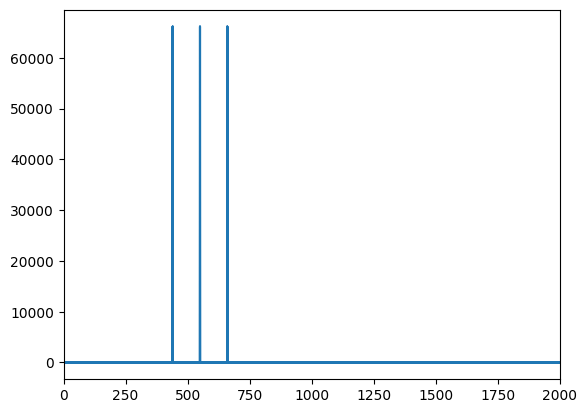

In [10]:
import scipy.fft

def plot_fft(signal, rate, freq_max):
    Y = np.abs(scipy.fft.fft(signal))
    X = np.abs(scipy.fft.fftfreq(Y.size) * rate)
    plt.xlim(0, freq_max)
    plt.plot(X, Y)

plot_fft(chord, R, 2000)

## Gerçek hayattan örnekler

Klasördeki `.wav` dosyalarına `fft` uygulayalım:

In [11]:
!ls -lh *.wav

-rw-r--r-- 1 doganalper doganalper 506K Feb 23 20:03 bird.wav
-rw-r--r-- 1 doganalper doganalper 379K Feb 23 20:03 blissful_bell.wav
-rw-r--r-- 1 doganalper doganalper 400K Feb 23 20:03 guitar_G.wav
-rw-r--r-- 1 doganalper doganalper 266K Feb 23 20:03 piano_F.wav
-rw-r--r-- 1 doganalper doganalper 100K Feb 23 20:03 snare_80s.wav


`bird.wav` dosyasındaki sesi yükleyelim ve sesin **dalga biçimini (waveform)** görselleştirelim

In [12]:
rate, audio = wavfile.read("bird.wav")
audio.T[0][R:(R+10)]

array([-396, -616, -699, -663, -531, -339, -138,   25,  126,  166],
      dtype=int16)

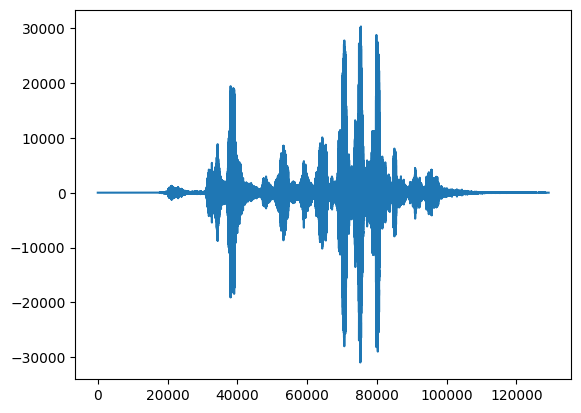

In [13]:
rate, audio = wavfile.read("bird.wav")
plt.plot(audio.T[0])

Şimdi bu sinyale FFT uygulayıp grafiğini çizelim ve sesi çalalım

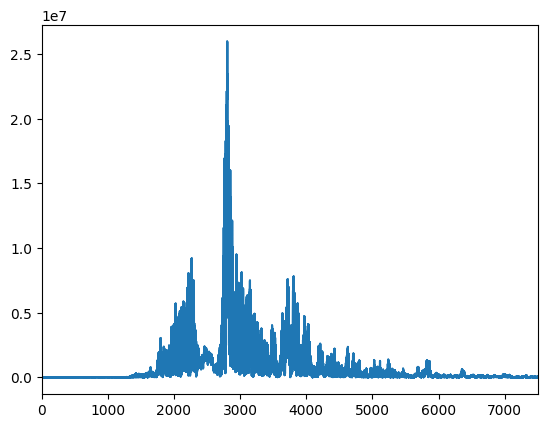

In [14]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

---

Harika!

❓ Şimdi sıra sizde: diğer seslerle de aynı analizi yapmayı deneyin (yukarıdaki `!ls -lh *.wav` hücresine bakın).

Şu an çalınan: piano_F.wav


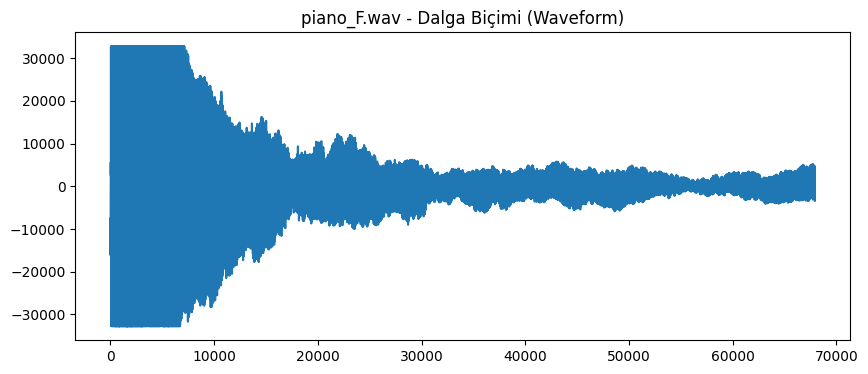

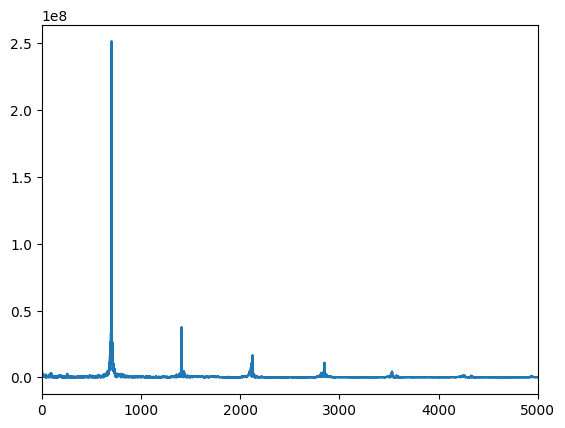

In [16]:


file_name = "piano_F.wav"


rate, audio = wavfile.read(file_name)


if len(audio.shape) > 1:
    audio_data = audio.T[0]
else:
    audio_data = audio


print(f"Şu an çalınan: {file_name}")
display(Audio(audio_data, rate=rate))


plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title(f"{file_name} - Dalga Biçimi (Waveform)")
plt.show()

plot_fft(audio_data, rate, 5000)